In [1]:
import wobble
import numpy as np
import matplotlib.pyplot as plt

/Users/mbedell/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
o = 56
data = wobble.Data('51peg_e2ds.hdf5', filepath='data/', orders=[o])
results = wobble.Results(data)

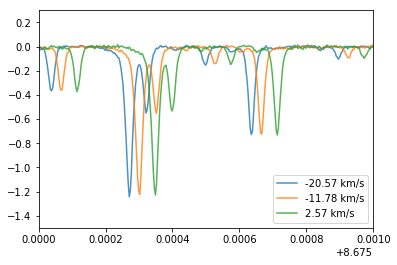

In [27]:
for e in [0,15,40]:
    plt.plot(data.xs[0][e], data.ys[0][e], alpha=0.8, 
             label='{0:.2f} km/s'.format(data.pipeline_rvs[e]*1.e-3))

plt.xlim([8.675,8.676])
plt.ylim([-1.5,0.3])
plt.legend();

#### If velocities follow convention, larger velocity should have the lines shifted right (redshifted).

In [19]:
shifted_xs = data.xs[0] + np.log(wobble.doppler(data.pipeline_rvs[:, None], tensors=False))

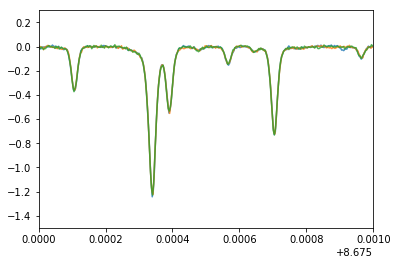

In [28]:
for e in [0,15,40]:
    plt.plot(shifted_xs[e], data.ys[0][e], alpha=0.8, 
             label='{0:.2f} km/s'.format(data.pipeline_rvs[e]*1.e-3))

plt.xlim([8.675,8.676])
plt.ylim([-1.5,0.3]);

#### If Doppler shift code is working, all the spectra should have lines in the same places now.

In [29]:
model = wobble.Model(data, results, 0)
model.add_star('star')
wobble.optimize_order(model, niter=60)

100%|██████████| 60/60 [00:00<00:00, 80.46it/s]


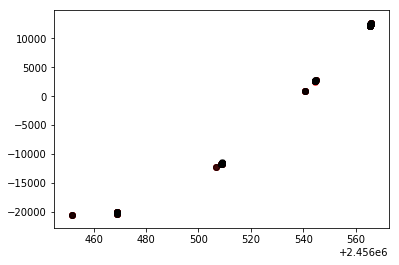

In [33]:
plt.scatter(data.dates, results.star_rvs[0], c='r', alpha=0.6)
plt.scatter(data.dates, data.pipeline_rvs, c='k', alpha=0.5);

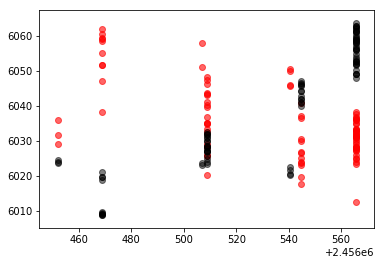

In [34]:
plt.scatter(data.dates, results.star_rvs[0] - data.bervs, c='r', alpha=0.6)
plt.scatter(data.dates, data.pipeline_rvs - data.bervs, c='k', alpha=0.5);